# CPG

In this project In this project, I work on a dataset of CPG firms. The company holds warehouses in various cities across the country. Different items are sent to these warehouses every week and from where they are distributed to various small stores daily.


I had a dataset folder it has 4 sheats. \
sample_submission that show how i need to show my final outcomes. \
submission_weekly which i need to update for final submission. \
test \
train

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:

sample_submission = pd.read_csv('dataset/sample_submission.csv')
submission_weekly = pd.read_csv('dataset/submission_weekly.csv')
test = pd.read_csv('dataset/test.csv')
train = pd.read_csv('dataset/train.csv')

# Display the first few rows of each dataframe to verify loading
print(sample_submission.head())
print(submission_weekly.head())
print(test.head())
print(train.head())


       ID  weekly_dispatch_count
0  0x2d3e                   1000
1  0x3460                   1000
2  0x3b82                   1000
3  0x42a4                   1000
4  0x49c6                   1000
       ID  weekly_dispatch_count
0  0x31fe                    NaN
1  0x31ff                    NaN
2  0x3ed4                    NaN
3  0x3ed5                    NaN
4  0x4a3c                    NaN
       ID      date warehouse_ID   Latitude   Longitude Product_Type  year  \
0  0x3ed2  5/1/2021     WH_0x3ea  38.749077 -105.183060       Type_A  2021   
1  0x3ed3  5/1/2021     WH_0x3ea  38.749077 -105.183060       Type_B  2021   
2  0x4a3a  5/1/2021     WH_0x3eb  35.678970 -109.067413       Type_A  2021   
3  0x4a3b  5/1/2021     WH_0x3eb  35.678970 -109.067413       Type_B  2021   
4  0x54b2  5/1/2021     WH_0x3ec  34.361664  -86.305595       Type_A  2021   

  month is_weekend is_warehouse_closed  
0   May        Yes                  No  
1   May        Yes                  No  
2   May     

### Data Cleaning

I have already done some operation on it like filled the blanks with not available in excel sheat. Just to say it is not the original dataset.I have cleaned it for my purpose

In [3]:
# Check for missing values
print(sample_submission.isnull().sum())
print(submission_weekly.isnull().sum())
print(test.isnull().sum())
print(train.isnull().sum())

ID                       0
weekly_dispatch_count    0
dtype: int64
ID                         0
weekly_dispatch_count    700
dtype: int64
ID                     0
date                   0
warehouse_ID           0
Latitude               0
Longitude              0
Product_Type           0
year                   0
month                  0
is_weekend             0
is_warehouse_closed    0
dtype: int64
ID                           0
date                         0
warehouse_ID                 0
Latitude                     0
Longitude                    0
Product_Type                 0
year                         0
month                        0
is_weekend                   0
is_warehouse_closed          0
daily_dispatch_count         0
weekly_dispatch_count    13094
dtype: int64


So in our train dataset we have column that is weekly_dispatch_count that we need to fill up

Lets check train size

In [4]:
print(train.shape)

(15272, 12)


We need to fill some values in weekly_dispatch_count. I have observed that if is_weekend is 'Yes', it means the warehouse is open only on weekends and the value of weekly_dispatch_count should be the same as daily_dispatch_count. If is_weekend is 'No', then weekly_dispatch_count should be approximately 7 times the daily_dispatch_count, but not exactly. We will introduce variability by multiplying by a random number between 6 and 8. Let's create a function to implement this logic.

In [5]:
def fill_weekly_dispatch(row):
    # Check if weekly_dispatch_count is missing
    if pd.isnull(row['weekly_dispatch_count']):
        # If it's a weekend, copy daily_dispatch_count to weekly_dispatch_count
        if row['is_weekend'] == 'Yes':
            return row['daily_dispatch_count']
        else:
            # If it's not a weekend, multiply daily_dispatch_count by a random number between 6 and 8
            return row['daily_dispatch_count'] * np.random.uniform(6, 8)
    else:
        # If weekly_dispatch_count is not missing, keep the original value
        return row['weekly_dispatch_count']

# Apply the function to fill missing weekly dispatch cou
train['weekly_dispatch_count'] = train.apply(fill_weekly_dispatch, axis=1)


In [6]:
print(train[['daily_dispatch_count', 'weekly_dispatch_count', 'is_weekend']].head(10))

   daily_dispatch_count  weekly_dispatch_count is_weekend
0                   5.5               5.500000        Yes
1                   6.1               6.100000        Yes
2                   4.8              34.585224         No
3                   6.7              51.118068         No
4                   5.8              36.489714         No
5                   6.6              44.408087         No
6                   7.0              50.991165         No
7                   4.9              34.413588         No
8                   5.9              40.734745         No
9                   7.2              53.767833         No


In [7]:
print(train['weekly_dispatch_count'].isnull().sum())

0


Lets See a distribution of weekly dispatch

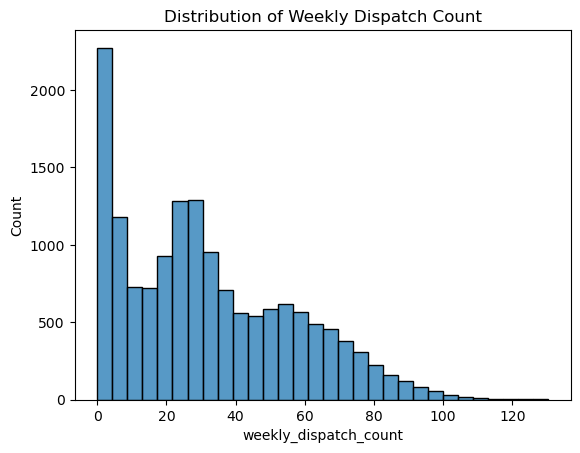

In [8]:
# Example: Distribution of weekly dispatch count
sns.histplot(train['weekly_dispatch_count'], bins=30)
plt.title('Distribution of Weekly Dispatch Count')
plt.show()



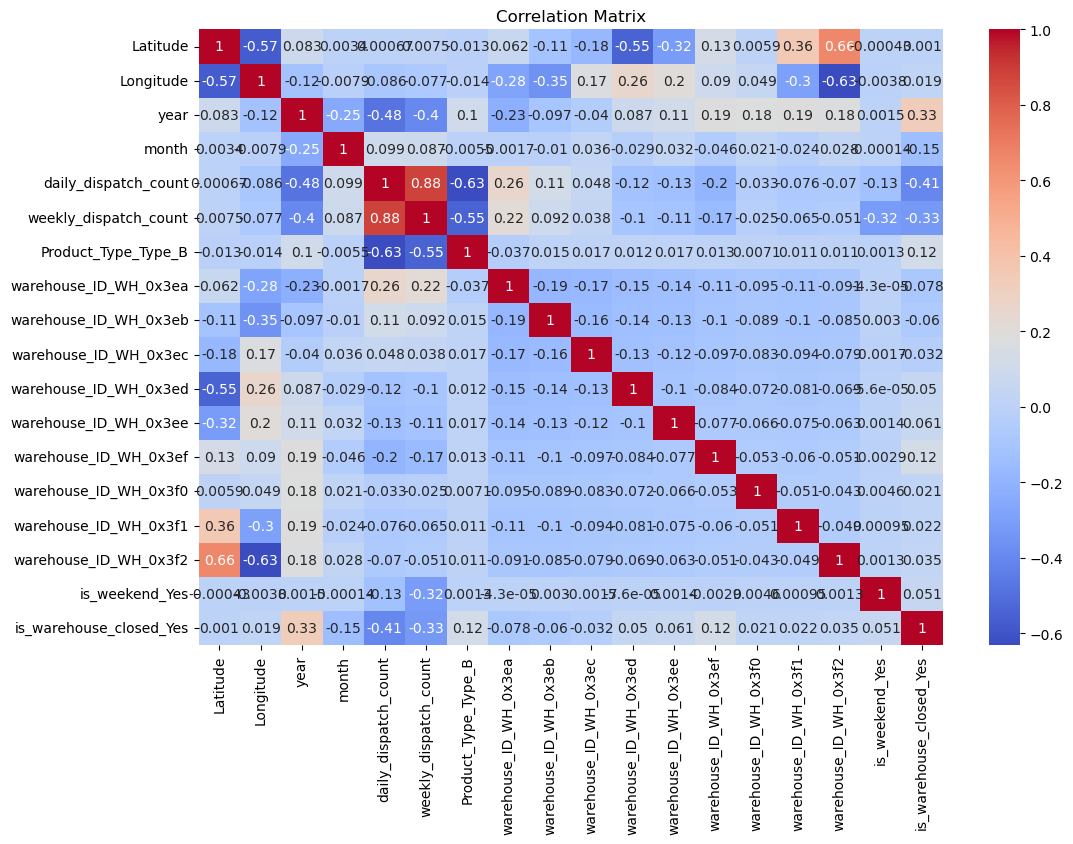

In [9]:


# Assuming the train DataFrame is loaded
# Convert date to datetime if not already done
train['date'] = pd.to_datetime(train['date'], errors='coerce')

# Example: Extracting month and year from the date
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

# Convert daily_dispatch_count and weekly_dispatch_count to numeric, coercing errors to NaN
train['daily_dispatch_count'] = pd.to_numeric(train['daily_dispatch_count'], errors='coerce')
train['weekly_dispatch_count'] = pd.to_numeric(train['weekly_dispatch_count'], errors='coerce')

# Handle NaN values
# Here, we will fill NaNs with the mean of the respective column, you can use other strategies as well
train['daily_dispatch_count'].fillna(train['daily_dispatch_count'].mean(), inplace=True)
train['weekly_dispatch_count'].fillna(train['weekly_dispatch_count'].mean(), inplace=True)

# Example: Encoding categorical variables
train_encoded = pd.get_dummies(train, columns=['Product_Type', 'warehouse_ID', 'is_weekend', 'is_warehouse_closed'], drop_first=True)

# Drop columns that are not numerical or not needed for correlation
train_encoded.drop(columns=['ID', 'date'], inplace=True)

# Calculate correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15272 entries, 0 to 15271
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Latitude                 15272 non-null  float64
 1   Longitude                15272 non-null  float64
 2   year                     15272 non-null  int32  
 3   month                    15272 non-null  int32  
 4   daily_dispatch_count     15272 non-null  float64
 5   weekly_dispatch_count    15272 non-null  float64
 6   Product_Type_Type_B      15272 non-null  bool   
 7   warehouse_ID_WH_0x3ea    15272 non-null  bool   
 8   warehouse_ID_WH_0x3eb    15272 non-null  bool   
 9   warehouse_ID_WH_0x3ec    15272 non-null  bool   
 10  warehouse_ID_WH_0x3ed    15272 non-null  bool   
 11  warehouse_ID_WH_0x3ee    15272 non-null  bool   
 12  warehouse_ID_WH_0x3ef    15272 non-null  bool   
 13  warehouse_ID_WH_0x3f0    15272 non-null  bool   
 14  warehouse_ID_WH_0x3f1 

In [11]:
len(train['warehouse_ID'].unique())

10

## Train Model


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the feature columns and target column
X = train_encoded.drop(columns=['weekly_dispatch_count'])
y = train_encoded['weekly_dispatch_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 6.630929790673312
Mean Squared Error (MSE): 111.1064082732327
R-squared (R2): 0.8176529914103061


In [21]:
test = pd.read_csv('dataset/test.csv')
submission_weekly = pd.read_csv('dataset/submission_weekly.csv')

print(test.head())
print(test.shape)

print(submission_weekly.head())
print(submission_weekly.shape)


       ID      date warehouse_ID   Latitude   Longitude Product_Type  year  \
0  0x3ed2  5/1/2021     WH_0x3ea  38.749077 -105.183060       Type_A  2021   
1  0x3ed3  5/1/2021     WH_0x3ea  38.749077 -105.183060       Type_B  2021   
2  0x4a3a  5/1/2021     WH_0x3eb  35.678970 -109.067413       Type_A  2021   
3  0x4a3b  5/1/2021     WH_0x3eb  35.678970 -109.067413       Type_B  2021   
4  0x54b2  5/1/2021     WH_0x3ec  34.361664  -86.305595       Type_A  2021   

  month is_weekend is_warehouse_closed  
0   May        Yes                  No  
1   May        Yes                  No  
2   May        Yes                 Yes  
3   May        Yes                  No  
4   May        Yes                  No  
(4497, 10)
       ID  weekly_dispatch_count
0  0x31fe                    NaN
1  0x31ff                    NaN
2  0x3ed4                    NaN
3  0x3ed5                    NaN
4  0x4a3c                    NaN
(700, 2)


going for those IDs that are present on test.csv file

In [22]:
# Ensure 'ID' column is present in both dataframes
filtered_test = test[test['ID'].isin(submission_weekly['ID'])]

print(filtered_test.head())
print(filtered_test.shape)


        ID      date warehouse_ID   Latitude   Longitude Product_Type  year  \
18  0x31fe  5/2/2021     WH_0x3e9  41.681471  -72.794746       Type_A  2021   
19  0x31ff  5/2/2021     WH_0x3e9  41.681471  -72.794746       Type_B  2021   
20  0x3ed4  5/2/2021     WH_0x3ea  38.749077 -105.183060       Type_A  2021   
21  0x3ed5  5/2/2021     WH_0x3ea  38.749077 -105.183060       Type_B  2021   
22  0x4a3c  5/2/2021     WH_0x3eb  35.678970 -109.067413       Type_A  2021   

   month is_weekend is_warehouse_closed  
18   May        Yes                  No  
19   May        Yes                  No  
20   May        Yes                  No  
21   May        Yes                  No  
22   May        Yes                  No  
(650, 10)


In [23]:
# Convert 'month' column to numerical values if necessary
if 'month' in filtered_test.columns:
    month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                     'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
    filtered_test['month'] = filtered_test['month'].map(month_mapping)

# Encode categorical variables using one-hot encoding
filtered_test_encoded = pd.get_dummies(filtered_test, columns=['Product_Type', 'warehouse_ID', 'is_weekend', 'is_warehouse_closed'], drop_first=True)

# Align the filtered test data with the training data
missing_cols = set(train_encoded.columns) - set(filtered_test_encoded.columns)
for col in missing_cols:
    filtered_test_encoded[col] = 0

# Ensure the filtered test dataframe columns are in the same order as the training dataframe
filtered_test_encoded = filtered_test_encoded[train_encoded.drop(columns=['weekly_dispatch_count']).columns]

print(filtered_test_encoded.head())
print(filtered_test_encoded.shape)


     Latitude   Longitude  year  month  daily_dispatch_count  \
18  41.681471  -72.794746  2021      5                     0   
19  41.681471  -72.794746  2021      5                     0   
20  38.749077 -105.183060  2021      5                     0   
21  38.749077 -105.183060  2021      5                     0   
22  35.678970 -109.067413  2021      5                     0   

    Product_Type_Type_B  warehouse_ID_WH_0x3ea  warehouse_ID_WH_0x3eb  \
18                False                  False                  False   
19                 True                  False                  False   
20                False                   True                  False   
21                 True                   True                  False   
22                False                  False                   True   

    warehouse_ID_WH_0x3ec  warehouse_ID_WH_0x3ed  warehouse_ID_WH_0x3ee  \
18                  False                  False                  False   
19                  False 

C:\Users\Lenovo-1\AppData\Local\Temp\ipykernel_12912\3951047544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test['month'] = filtered_test['month'].map(month_mapping)


In [24]:
# Make predictions
filtered_test_predictions = model.predict(filtered_test_encoded)


Creating a CSV file

In [26]:
# Create a dictionary to map IDs to predictions
id_to_prediction = dict(zip(filtered_test['ID'], filtered_test_predictions))

# Create a new list for the predictions in the order of the submission file
submission_predictions = [id_to_prediction.get(id, 0) for id in submission_weekly['ID']]

# Update the submission dataframe with the predictions
submission_weekly['weekly_dispatch_count'] = submission_predictions

# Save the submission to a CSV file
submission_weekly.to_csv('submission.csv', index=False)
print('Submission file created successfully.')


Submission file created successfully.
